In [2]:
%matplotlib inline
from astropy.io import fits
from astroquery.mast import Observations
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#filter data
obsCount = Observations.query_criteria_count(obs_collection = "TESS",
                                             dataproduct_type = ["timeseries"],
                                             sequence_number = 40,
                                             proposal_id = "*G04098*")
print("Number of Observations: %i" % obsCount)

obsTable = Observations.query_criteria(obs_collection = "TESS",
                                       dataproduct_type = ["timeseries"],
                                       sequence_number = 40,
                                       proposal_id = "*G04098*")
obsTable[0:5]['obsid','proposal_id','obs_id']

#astroquery to retrieve the list of data products
dataProducts = Observations.get_product_list(obsTable[0:1])
dataProducts.colnames

dataProducts['obsID', 'productFilename', 'description']

want = dataProducts['description'] == "Light curves"
print(dataProducts[want])

manifest = Observations.download_products(dataProducts[want])
print(manifest)

Number of Observations: 102
 obsID   obs_collection dataproduct_type ... parent_obsid dataRights calib_level
-------- -------------- ---------------- ... ------------ ---------- -----------
62347175           TESS       timeseries ...     62347175     PUBLIC           3
INFO: Found cached file ./mastDownload/TESS/tess2021175071901-s0040-0000000026817004-0211-s/tess2021175071901-s0040-0000000026817004-0211-s_lc.fits with expected size 2062080. [astroquery.query]
                                                         Local Path                                                         ...
--------------------------------------------------------------------------------------------------------------------------- ...
./mastDownload/TESS/tess2021175071901-s0040-0000000026817004-0211-s/tess2021175071901-s0040-0000000026817004-0211-s_lc.fits ...


In [4]:
# Query Information
mission = "TESS"
dataProdType = ["timeseries"]
GiProgram = "*G011183*"
fileType = "Light curves"
sector = 1

# Query Mast Holdings
obsTable = Observations.query_criteria(obs_collection = mission,
                                       dataproduct_type = dataProdType,
                                       sequence_number = sector,
                                       proposal_id = GiProgram)

# Get Product List
dataProducts = Observations.get_product_list(obsTable[0:1])
want = dataProducts['description'] == fileType

# Download Data
manifest = Observations.download_products(dataProducts[want])
print(manifest)

INFO: Found cached file ./mastDownload/TESS/tess2018206045859-s0001-0000000099837626-0120-s/tess2018206045859-s0001-0000000099837626-0120-s_lc.fits with expected size 2039040. [astroquery.query]
                                                         Local Path                                                         ...
--------------------------------------------------------------------------------------------------------------------------- ...
./mastDownload/TESS/tess2018206045859-s0001-0000000099837626-0120-s/tess2018206045859-s0001-0000000099837626-0120-s_lc.fits ...


In [6]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
#fits_file = "https://archive.stsci.edu/missions/tess/tid/s0001/0000/0000/2515/5310/tess2018206045859-s0001-0000000025155310-0120-s_lc.fits"
fits_file = "./mastDownload/TESS/tess2021175071901-s0040-0000000027769688-0211-a_fast/tess2021175071901-s0040-0000000027769688-0211-a_fast-lc.fits"
#fits_file = 'C:\\Users\\tobri\\TESSData\\tess2021175071901-s0040-0000000022114516-0211-s_lc.fits'
#abs_pathname = os.path.abspath("tess2018206045859-s0001-0000000025153007-0120-s_lc.fits")

#print(abs_pathname)
#file=open(path, "r")
#os.listdir()

#nb_full_path = os.path.join(os.getcwd(),"LR_ML.xlsx" )
#print(nb_full_path)

In [7]:
fits.info(fits_file)
fits.getdata(fits_file, ext=1).columns

with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

Filename: ./mastDownload/TESS/tess2021175071901-s0040-0000000027769688-0211-a_fast/tess2021175071901-s0040-0000000027769688-0211-a_fast-lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   121861R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


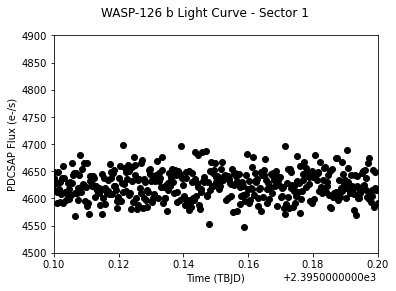

In [23]:
# Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
t0 = 2405

# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Center the x-axis on where we expect a transit to be (time = T0), and set
# the x-axis range within +/- 1 day of T0.
ax.set_xlim(t0 - 10, t0 - 5)
plt.axis([2395.1, 2395.2, 4500, 4900])

# Overplot a red vertical line that should be where the transit occurs.
ax.axvline(x=t0, color="red")

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
plt.show()

In [ ]:
#print(tess_bjds)
#for test in pdcsap_fluxes:
#    print(test)
print(len(pdcsap_fluxes))
print(len(tess_bjds))
#test

121861
121861


In [ ]:
# First we need to read in the array of cadence quality flags, let's do
# that now.
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['QUALITY']

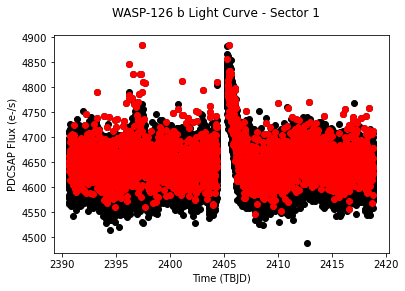

In [ ]:
# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(tess_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()

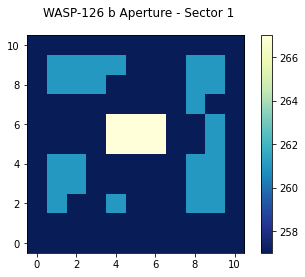

100001011


In [ ]:
with fits.open(fits_file, mode="readonly") as hdulist:
    aperture = hdulist[2].data

# Start figure and axis.
fig, ax = plt.subplots()

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("WASP-126 b Aperture - Sector 1")
plt.show()   

# Break down a pixel value of 267 (yellow pixels displayed above) into its
# constituent bits.
bitmask = np.binary_repr(267)
print(bitmask)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c58af11-5d4f-40f3-a808-e868f2c28485' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>